In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfea
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec

In [3]:
def basin(left, right, bottom, top):
    #
    glbdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    #
    SUF = '.gl5'
    dtype = 'float32'
    gl5shape = (2160, 4320)
    #
    resolution = 12
    nx, ny = (right - left)*resolution, (top - bottom)*resolution
    rgnshape = (ny, nx)
    img_extent = (left, right, bottom, top)
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    
    #------------------------------------------------------------------------------------------------------------------------

    rivnum = np.fromfile(f'{glbdir}/dat/riv_num_/rivnum.CAMA.gl5', dtype='float32').reshape(gl5shape)
    rivnum_cropped = rivnum[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
    rivnum_cropped = np.ma.masked_where(rivnum_cropped == 0, rivnum_cropped)
    
    # plot
    projection = ccrs.PlateCarree(central_longitude=0)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.add_feature(cfea.LAKES, color='#d3d3d3')
    im = ax.imshow(rivnum_cropped, extent=img_extent, transform=projection, cmap='rainbow', vmin=0, vmax=50)
    fig.colorbar(im, ax=ax)

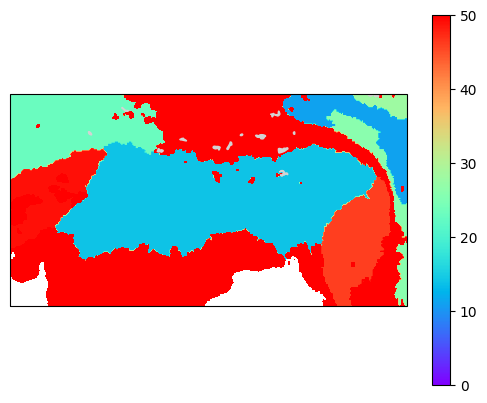

In [4]:
left = 70
right = 100
bottom = 19
top = 35
basin(left, right, bottom, top)

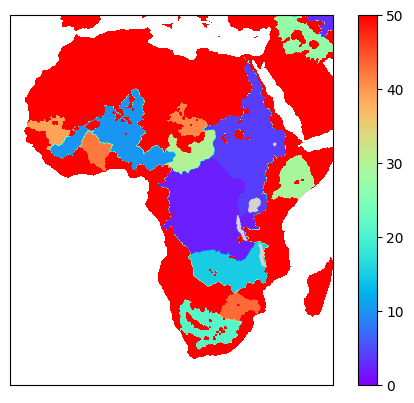

In [5]:
left = -20
right = 50
bottom = -40
top = 40
basin(left, right, bottom, top)